In [1]:
import pickle
import os
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets.base import get_data_home
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import text, sequence
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns

from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers


In [2]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

In [3]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    df = pickle.load(data)

In [4]:
df['category'].value_counts()
df=df.sample(frac=1)

In [5]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 5040
Test size: 2160


In [6]:
train_posts = df['article'][:train_size]
train_tags = df['category'][:train_size]

test_posts = df['article'][train_size:]
test_tags = df['category'][train_size:]

In [7]:
train_tags.value_counts()

World         865
Business      849
Lifestyle     835
Technology    834
Singapore     830
Sports        827
Name: category, dtype: int64

In [8]:
test_tags.value_counts()

Sports        373
Singapore     370
Technology    366
Lifestyle     365
Business      351
World         335
Name: category, dtype: int64

In [9]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [10]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [11]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [12]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [13]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (5040, 1000)
x_test shape: (2160, 1000)
y_train shape: (5040, 6)
y_test shape: (2160, 6)


In [14]:
batch_size = 32
epochs = 50

In [15]:
def createModel():# Build the model
    model = Sequential()
    model.add(Dense(512, input_shape=(max_words,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [16]:
model       = createModel() # This is meant for training
modelGo     = createModel() # This is used for final testing

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
_________________________________________________________________
activation_1 (Activation)    (None, 6)                 0         
Total params: 515,590
Trainable params: 515,590
Non-trainable params: 0
_________________________________________________________________


In [17]:
modelname   = 'bow_cnn'
filepath        = modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

                            # Log the epoch detail into csv
csv_logger      = CSVLogger(modelname +'.csv')
callbacks_list  = [checkpoint,csv_logger]

In [18]:
model.fit(x_train, 
          y_train, 
          validation_data=(x_test, y_test), 
          epochs=100, 
          batch_size=128,
          shuffle=True,
          callbacks=callbacks_list)

W0917 21:16:18.403352 14092 deprecation.py:323] From C:\Users\darry\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\ops\math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5040 samples, validate on 2160 samples
Epoch 1/100
5040/5040 [==============================] - 1s 151us/sample - loss: 0.2777 - accuracy: 0.8859 - val_loss: 0.1954 - val_accuracy: 0.9237
Epoch 2/100
5040/5040 [==============================] - 0s 35us/sample - loss: 0.1545 - accuracy: 0.9404 - val_loss: 0.1751 - val_accuracy: 0.9318
Epoch 3/100
5040/5040 [==============================] - 0s 35us/sample - loss: 0.1186 - accuracy: 0.9553 - val_loss: 0.1703 - val_accuracy: 0.9351
Epoch 4/100
5040/5040 [==============================] - 0s 32us/sample - loss: 0.0947 - accuracy: 0.9650 - val_loss: 0.1724 - val_accuracy: 0.9346
Epoch 5/100
5040/5040 [==============================] - 0s 34us/sample - loss: 0.0776 - accuracy: 0.9724 - val_loss: 0.1751 - val_accuracy: 0.9369
Epoch 6/100
5040/5040 [==============================] - 0s 32us/sample - loss: 0.0635 - accuracy: 0.9788 - val_loss: 0.1859 - val_accuracy: 0.9326
Epoch 7/100
5040/5040 [==============================] - 0s 31u

Epoch 56/100
5040/5040 [==============================] - 0s 31us/sample - loss: 0.0176 - accuracy: 0.9916 - val_loss: 0.2778 - val_accuracy: 0.9333
Epoch 57/100
5040/5040 [==============================] - 0s 31us/sample - loss: 0.0197 - accuracy: 0.9918 - val_loss: 0.2736 - val_accuracy: 0.9335
Epoch 58/100
5040/5040 [==============================] - 0s 31us/sample - loss: 0.0186 - accuracy: 0.9918 - val_loss: 0.2792 - val_accuracy: 0.9327
Epoch 59/100
5040/5040 [==============================] - 0s 31us/sample - loss: 0.0178 - accuracy: 0.9922 - val_loss: 0.2823 - val_accuracy: 0.9329
Epoch 60/100
5040/5040 [==============================] - 0s 31us/sample - loss: 0.0196 - accuracy: 0.9916 - val_loss: 0.2792 - val_accuracy: 0.9322
Epoch 61/100
5040/5040 [==============================] - 0s 31us/sample - loss: 0.0188 - accuracy: 0.9926 - val_loss: 0.2764 - val_accuracy: 0.9327
Epoch 62/100
5040/5040 [==============================] - 0s 31us/sample - loss: 0.0201 - accuracy: 0.9911

In [19]:
optmz       = optimizers.RMSprop(lr=0.0001)

In [20]:
modelGo.load_weights(filepath)
modelGo.compile(loss='categorical_crossentropy', 
                optimizer=optmz, 
                metrics=['accuracy'])

In [21]:
# Make classification on the test dataset
predicts    = modelGo.predict(x_test)

# Prepare the classification output
# for the classification report
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(y_test,axis=1)

# the labels for the classfication report
testScores  = metrics.accuracy_score(testout,predout)
confusion   = metrics.confusion_matrix(testout,predout)

In [22]:
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,predout,target_names=category_mapping,digits=4))
print(confusion)

Best accuracy (on testing dataset): 80.46%
              precision    recall  f1-score   support

   Singapore     0.6764    0.6610    0.6686       351
      Sports     0.8725    0.8247    0.8479       365
   Lifestyle     0.8306    0.8081    0.8192       370
       World     0.9588    0.9357    0.9471       373
    Business     0.7512    0.8251    0.7865       366
  Technology     0.7370    0.7612    0.7489       335

    accuracy                         0.8046      2160
   macro avg     0.8044    0.8026    0.8030      2160
weighted avg     0.8068    0.8046    0.8052      2160

[[232   5  21   1  53  39]
 [ 11 301  13   3  18  19]
 [ 23  16 299   4  15  13]
 [  1   3   4 349   0  16]
 [ 35  10  14   1 302   4]
 [ 41  10   9   6  14 255]]


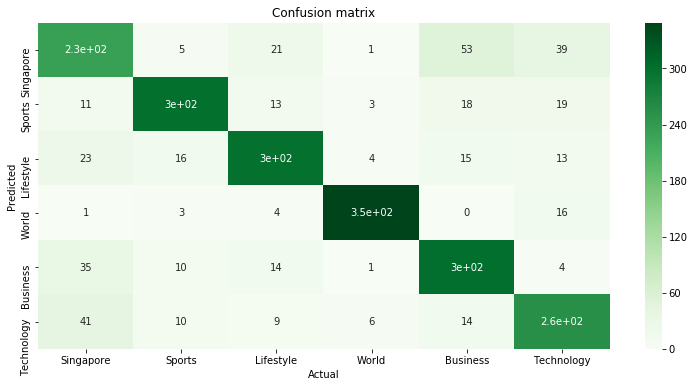

In [23]:
conf_matrix = confusion_matrix(testout, predout)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

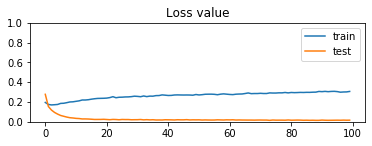

In [24]:
import pandas as pd

records     = pd.read_csv(modelname +'.csv')
plt.figure()
plt.subplot(211)
plt.plot(records['val_loss'], label='train')
plt.plot(records['loss'], label='test')
plt.yticks([0,0.20,0.40,0.60,0.80,1.00])
plt.title('Loss value',fontsize=12)
plt.legend()
plt.show()

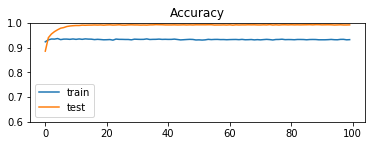

In [27]:
plt.subplot(212)
plt.plot(records['val_accuracy'], label='train')
plt.plot(records['accuracy'], label='test')
plt.yticks([0.6,0.7,0.8,0.9,1.0])
plt.title('Accuracy',fontsize=12)
plt.legend()
plt.show()